In [1]:
%cd ..

d:\work\ADASVehicleTracking


In [2]:
from GMM.coarse_clustering import run_GMM_clustering
from utils import props, show_image, get_cluster_images_separated, save_image_cmap, readImage

In [3]:
import numpy as np

In [4]:
filename = 'D:\work\ADASVehicleTracking\Data\DSC_1643.jpg'

Shape : (578, 872, 3) Maximum : 255 Minimum : 0 Data Type : uint8


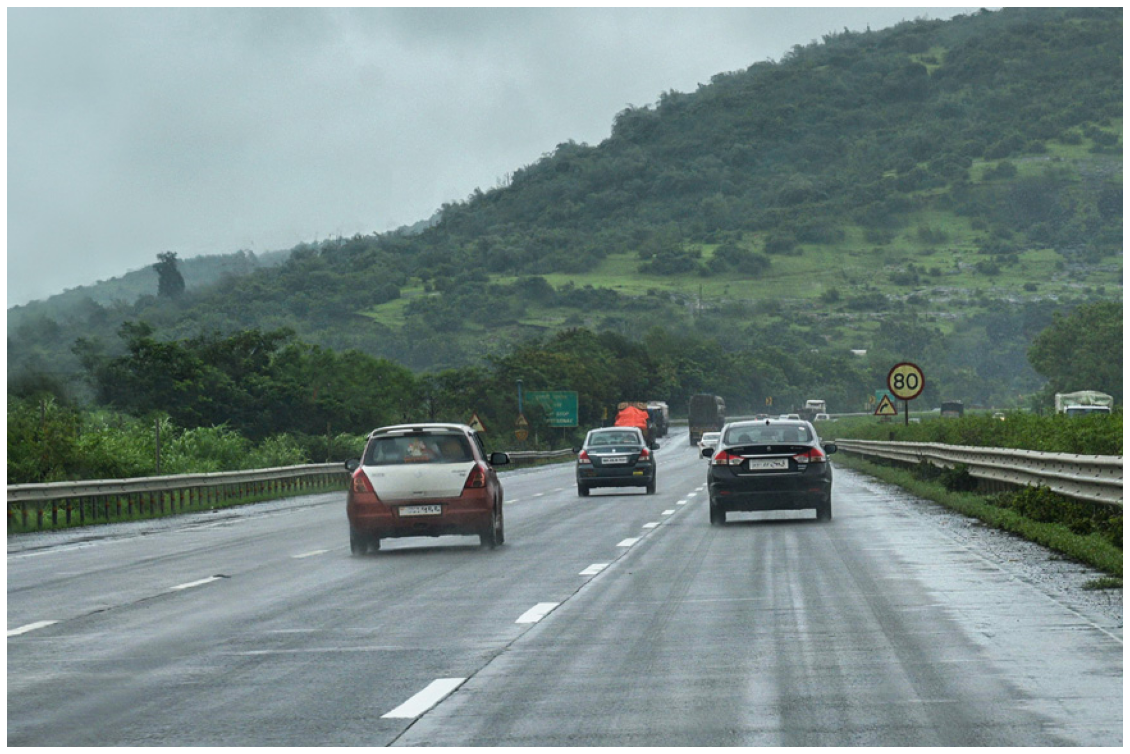

In [5]:
image_data = readImage(image_path = filename,convert_BGR2RGB=True)
props(image_data)
show_image(image_data)

In [6]:
num_of_clustering = 2

gmm_image = run_GMM_clustering(img_data = image_data, k = num_of_clustering)

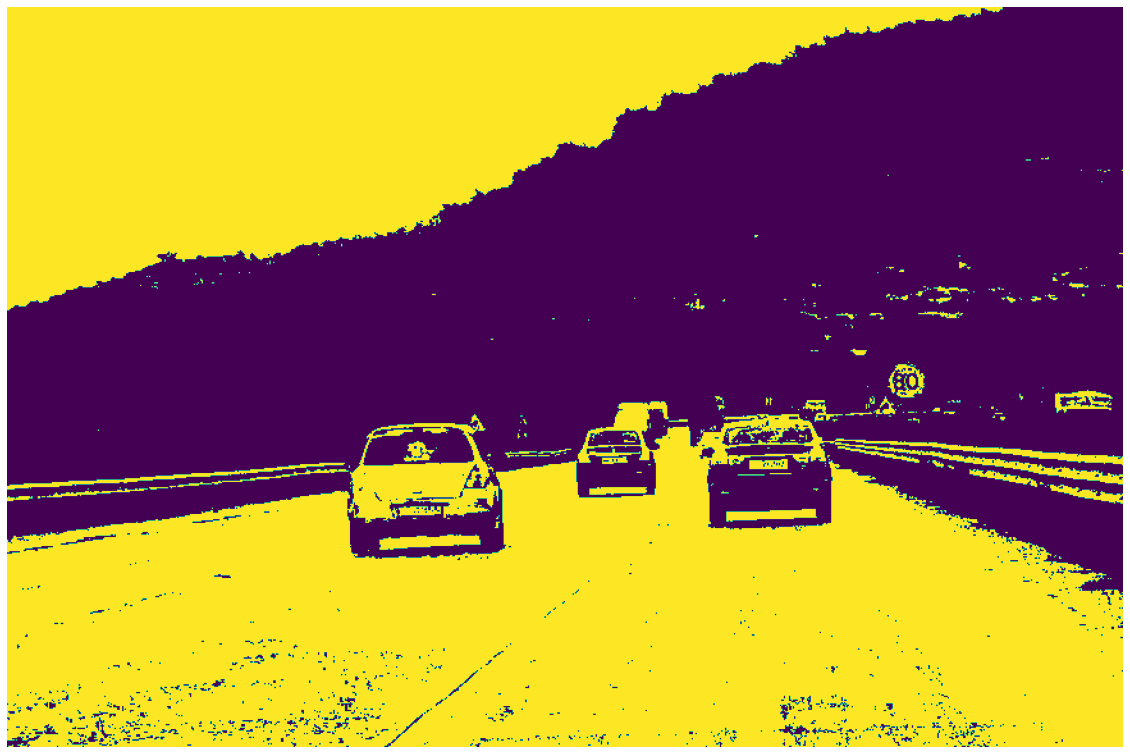

In [7]:
show_image(gmm_image, title = f"GMM_image_k_{num_of_clustering}")

In [8]:
save_image_cmap(image = gmm_image, title = f"GMM_image_k_{num_of_clustering}");
props(gmm_image, show_uniques=True)

Shape : (578, 872, 1) Maximum : 1 Minimum : 0 Data Type : uint8
Uniques : [0 1]


In [9]:
all_GMM_clustered_images = get_cluster_images_separated(gmm_image, save = True, prepend_save = f"GMM_image_k{num_of_clustering}_");

In [10]:
from CCL.fine_clustering import run_CCL_clustering, run_CCL_clustering_old

In [11]:
len(all_GMM_clustered_images)

2

In [12]:
all_CCL_clustered_images = list(map(lambda x: run_CCL_clustering_old(img_data = np.squeeze(x), convert_BGR2RGB=False), all_GMM_clustered_images))

In [13]:
len(all_CCL_clustered_images)

2

In [14]:
props(all_CCL_clustered_images[0])

Shape : (578, 872, 3) Maximum : 255 Minimum : 0 Data Type : uint8


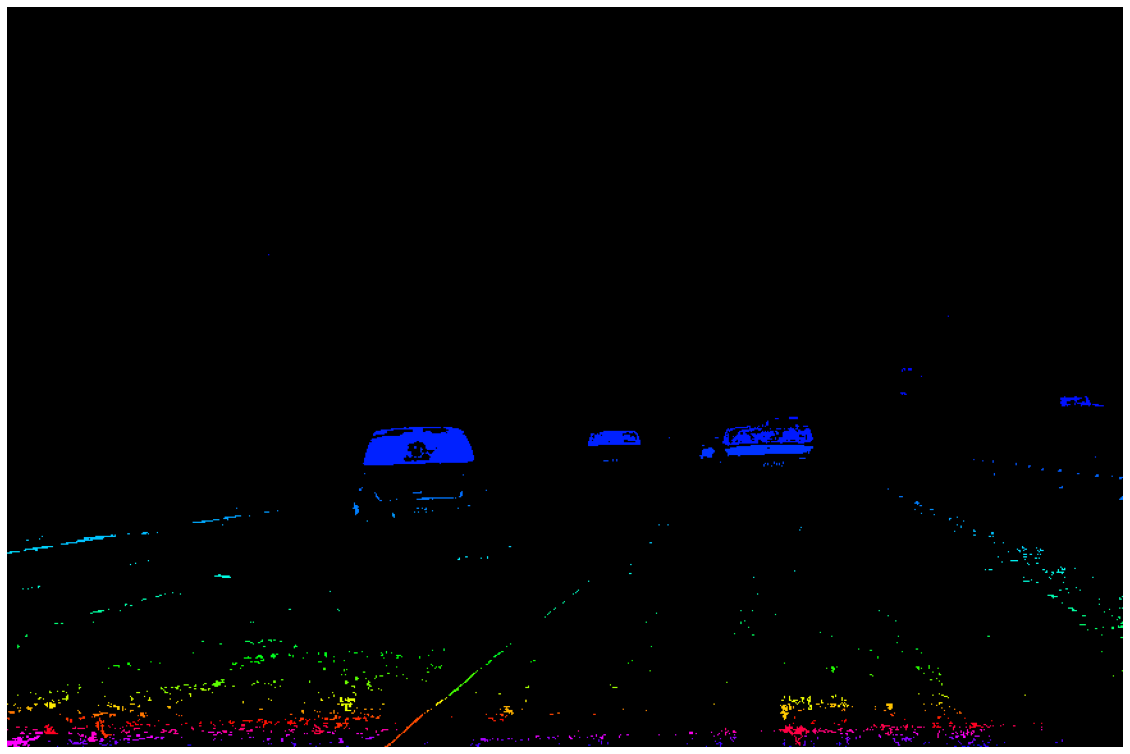

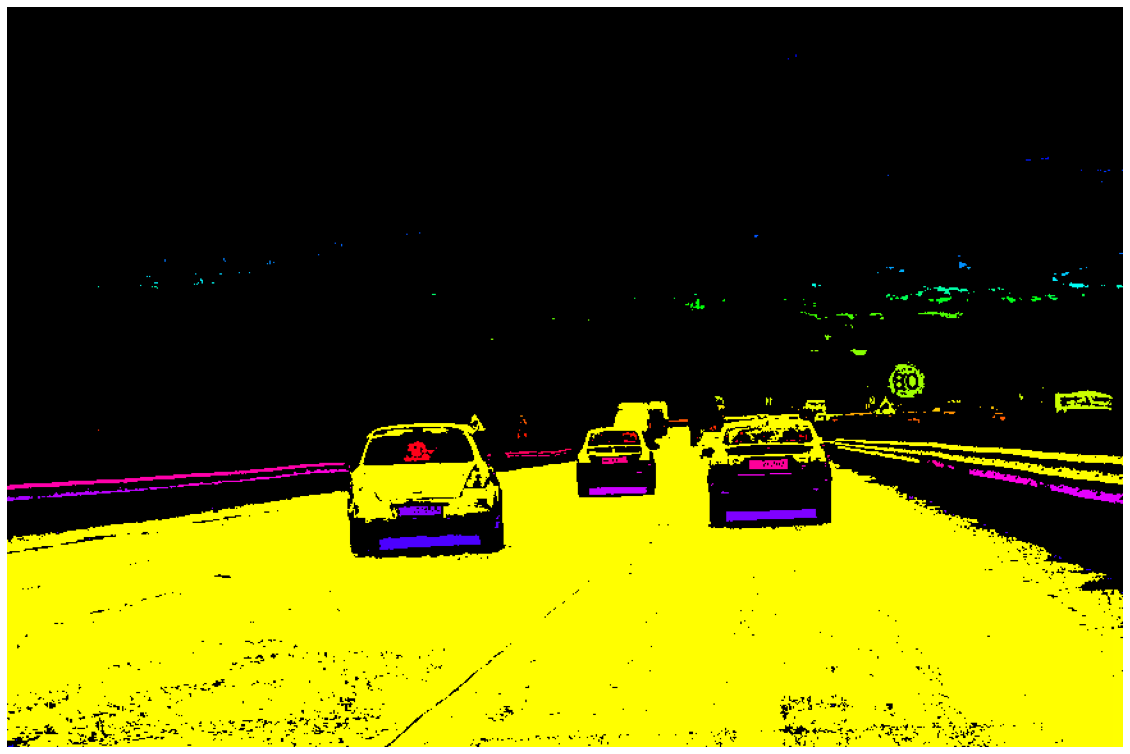

In [15]:
for each_image_index in range(len(all_CCL_clustered_images)):
    # print(each_image_index)
    each_image = all_CCL_clustered_images[each_image_index]
    # props(each_image, show_uniques=True) # Shape : (X, Y, 3) Maximum : 255 Minimum : 0 Data Type : uint8
    show_image(each_image, 
               title = f"CCL_image_cluster_{num_of_clustering}_{each_image_index}", 
               convert_BGR2RGB=False)

In [16]:
from Morphological_Transforms.external_filter import run_morphological_external_transform

Shape : (578, 872) Maximum : 255 Minimum : 0 Data Type : uint8


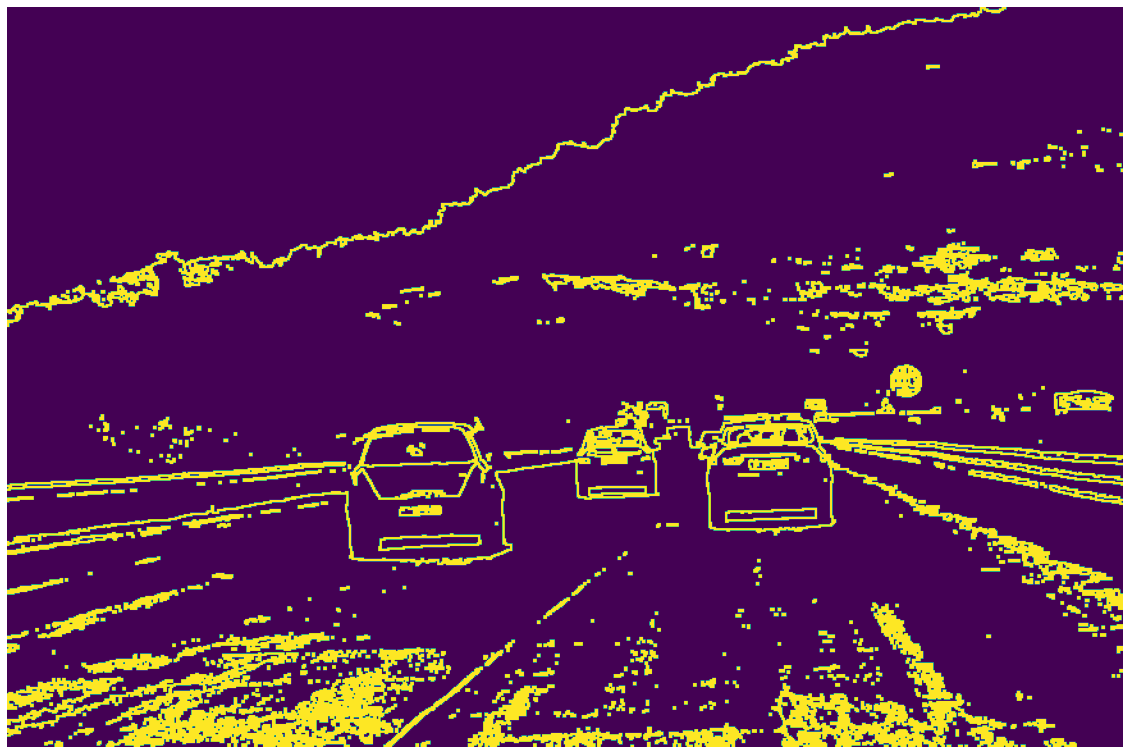

In [17]:
img_orig_morph = run_morphological_external_transform(img_data = image_data)
props(img_orig_morph)
show_image(img_orig_morph, title = "img_orig_morph")

In [18]:
all_GMM_morphed_images = list(map(lambda x: run_morphological_external_transform(img_data = np.squeeze(x)), all_GMM_clustered_images))


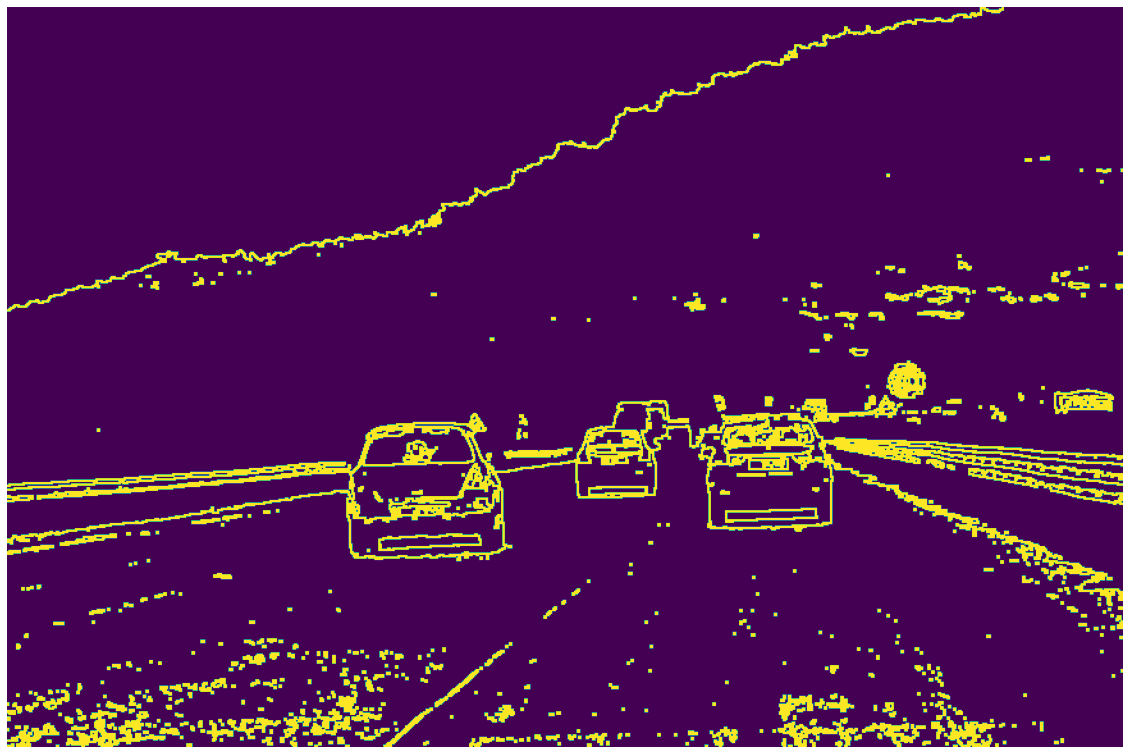

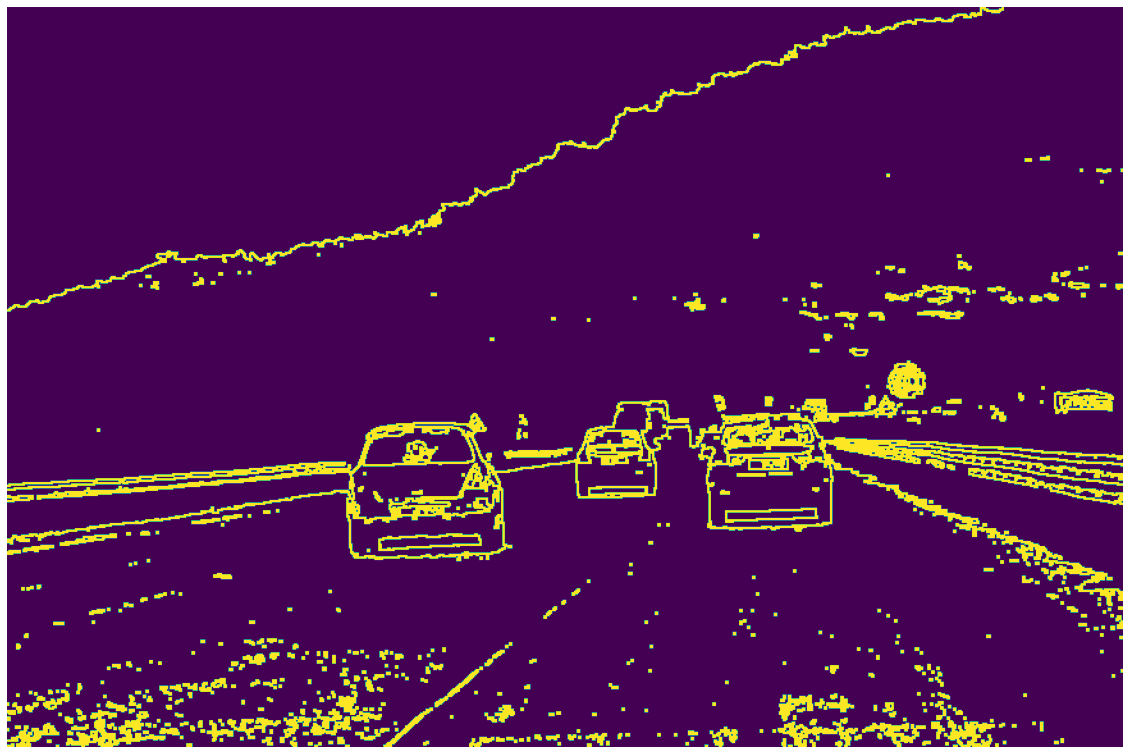

In [19]:
for each_image_index in range(len(all_GMM_morphed_images)):
    # print(each_image_index)
    each_image = all_GMM_morphed_images[each_image_index]
    # props(each_image, show_uniques=True) # Shape : (X, Y, 3) Maximum : 255 Minimum : 0 Data Type : uint8
    show_image(each_image, 
               title = f"GMM_Morphed_{num_of_clustering}_{each_image_index}", 
               convert_BGR2RGB=False)

In [20]:
all_CCL_morphed_images = list(map(lambda x: run_morphological_external_transform(img_data = np.squeeze(x)), all_CCL_clustered_images))


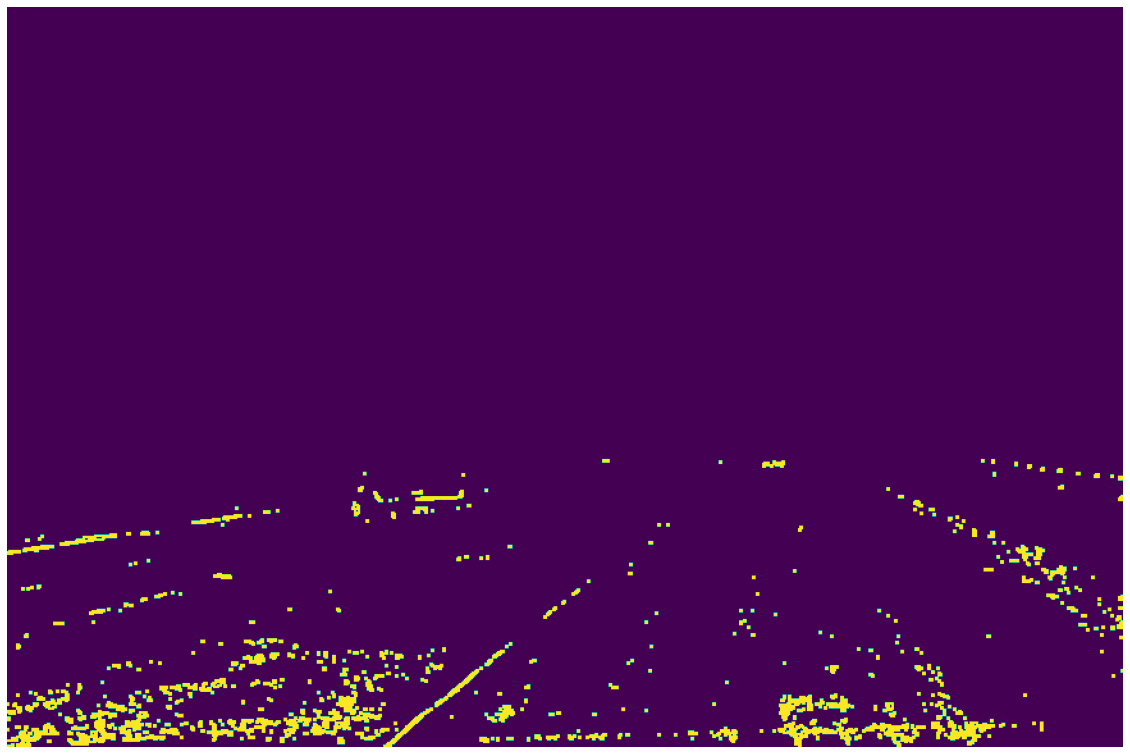

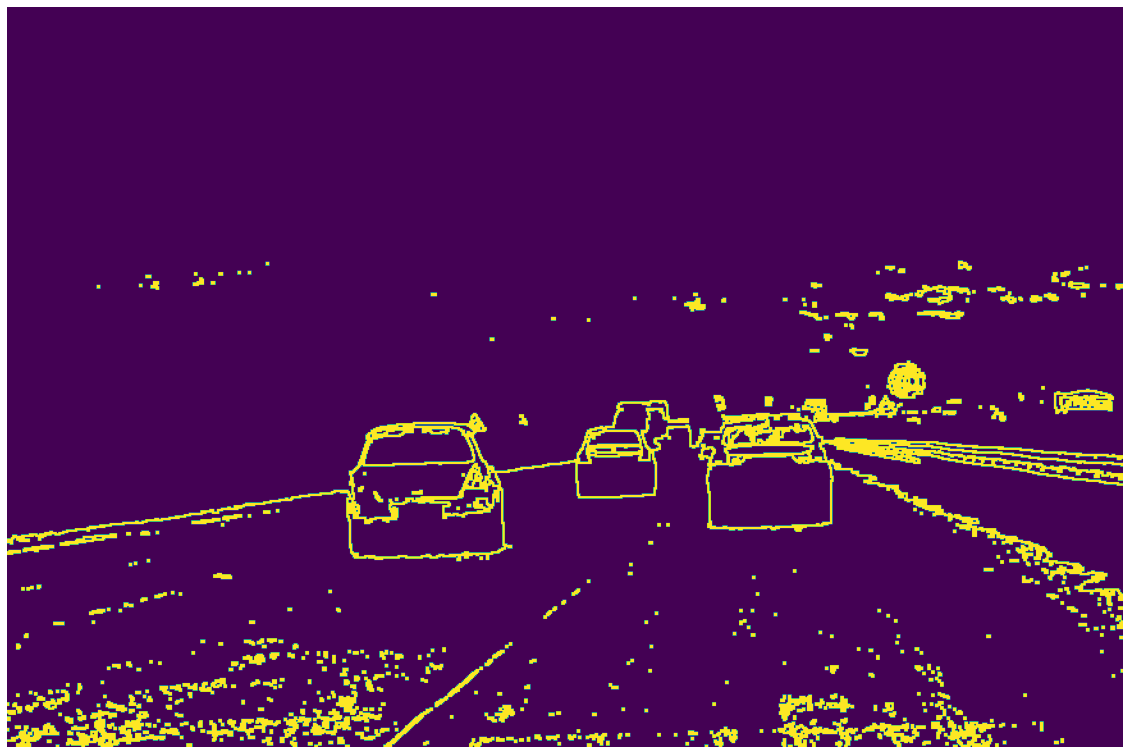

In [21]:
for each_image_index in range(len(all_CCL_morphed_images)):
    # print(each_image_index)
    each_image = all_CCL_morphed_images[each_image_index]
    # props(each_image, show_uniques=True) # Shape : (X, Y, 3) Maximum : 255 Minimum : 0 Data Type : uint8
    show_image(each_image, 
               title = f"CCL_Morphed_{num_of_clustering}_{each_image_index}", 
               convert_BGR2RGB=False)